# **Memoria del Proyecto de Aprendizaje por Refuerzo**

# **Análisis del Problema**

El problema a resolver es un entorno personalizado basado en la librería Gym. Este entorno simula un espacio con asteroides y una nave espacial. La nave puede moverse en cualquier dirección y tiene que evitar colisionar con los asteroides, y evitar salirse del espacio observable. 
La nave se inicializa en el método "reset" del entorno, con una posición y velocidad aleatoria, así como el asteroide, que tiene diferente posición, tamaño, velocidad, y dirección. El asteroide ejerce una atracción sobre la nave (gravedad) en función de la proximidad y de su tamaño, que modifica la propia inercia o velocidad de la nave. Esta velocidad es la que define la posición futura de la nave.


Las características del entorno son las siguientes:
- **Estados**: Los estados del entorno incluyen la posición y velocidad de la nave (x e y), el ángulo de la nave, y la posición, velocidad y tamaño de cada asteroide. 5 + 3 = 8 valores (1 solo asteroide).
- **Acciones**: Las acciones posibles que la nave puede tomar son: girar a la izquierda, girar a la derecha, propulsarse en la dirección que apunta la nave, y no hacer nada.
- **Recompensas**: Se otorga una recompensa de -1000 si la nave colisiona con un asteroide o se sale del entorno, y una recompensa de +10 por cada paso que la nave da sin colisionar, con el objetivo de que el agente aprenda a sobrevivir el mayor número posible de pasos.

La recompensa promedio por episodio que se espera conseguir es de 400 pasos. En caso de no hacer nada, la supervivencia media es de 20-30 pasos, hasta que la nave colisiona con un asteroide o se sale del espacio observable.

La aleatoriedad del estado inicial ayuda a prevenir el sobreajuste.

# **Validación de entorno**

Para el estado, se decide usar solo la posición x e Y del asteroide, y el tamaño, pero no la velocidad, con tal de reducir dimensionalidad al problema. De la misma forma, se decide optar solo por un asteroide por simplicidad. Además, se normaliza los parámetros del estado para evitar darle más peso a unos parámetros que a otros.
Se ha creado una clase ManualAgent para poder probar el juego en modo manual y entender la complejidad del juego. 


# **Elección del Algoritmo**

Para resolver este problema, se ha elegido el algoritmo de Q-Learning Profundo (Deep Q-Learning, DQL). Este algoritmo es una combinación de Q-Learning, que es un algoritmo de aprendizaje por refuerzo, y las redes neuronales profundas, o fully connected, que son una técnica de aprendizaje automático. 
La red neuronal empleada está formada por 2 capas densas con 128 neuronas cada una. Se escoge el número de neuronas tras hacer varias pruebas con diferentes tamaños. Además, teniendo en cuenta el número de acciones (4), el número de dimensiones del estado (8), y multiplicando por un factor de 4, quedan 4 *4 * 8 = 128 neuronas. 

Resumen red nueronal, 4 capas:

- **Capa de entrada** (8 neuronas, correspondientes a las 8 dimensiones del estado)
- **Primera capa oculta** (128 neuronas)
  - 1024 pesos (8 entradas * 128 neuronas)
  - 128 sesgos (uno por neurona)
- **Segunda capa oculta** (128 neuronas)
  - 16384 pesos (128 entradas * 128 neuronas)
  - 128 sesgos (uno por neurona)
- **Capa de salida** (4 neuronas, correspondientes a las 4 acciones)
  - 512 pesos (128 entradas * 4 neuronas) 
  - 4 sesgos (uno por neurona)


Total de 18180 parámetros entre pesos y sesgos, a entrenar.
Se ha empleado la función de activación RELU que ayuda a mitigar el problema del desvanecimiento del gradiente. 
En cuanto a la capa de salida, se emplea la función de activación lineal, puesto que la red lo que hace es predecir el valor Q o recompensa en caso de tomar cada una de las 4 acciones, pudiendo ser este valor cualquier número real.

La red toma como entrada el estado del entorno y produce como salida los valores Q para cada acción posible. 
Se entrena ajustando los pesos para minimizar la diferencia entre los valores Q predichos y los Q objetivo, calculados a partir de las recompensas recibidas y estimaciones actuales de los valores Q.

Se usa un valor de Gamma cercano a la unidad para incentivar al agente a planificar a largo plazo.

En cuanto a la memoria, se mantienen hasta 50.000 estados en memoria, los cuales se usan en batches de 128 ud para entrenar. Se ha probado con varios valores de memoria y de tamaño de batches. Una memoria mayor permite una variedad mayor de estados de cara al entrenamiento, aunque requiere más tiempo de entrenamiento y recursos. En cuanto al tamaño del lote, un tamaño mayor requiere más recursos computacionales pero puede reducir el tiempo de entrenamiento.

Durante el entrenamiento, se utiliza una política de exploración epsilon-greedy. Esta política implica que el agente toma la mayoría de sus acciones de acuerdo con la política que maximiza la recompensa esperada (la política greedy), pero con una probabilidad epsilon, el agente toma una acción aleatoria. Esto permite al agente explorar el entorno y aprender nuevas estrategias.


La elección de este algoritmo se debe a varias razones. En primer lugar, DQL es capaz de manejar entornos con un gran número de estados, como es el caso de nuestro entorno personalizado. En segundo lugar, DQL puede aprender directamente a partir de las observaciones del entorno, sin necesidad de un modelo del entorno. Por último, DQL ha demostrado ser eficaz en una amplia variedad de tareas, incluyendo el juego de Atari, que tiene similitudes con nuestro problema.



# **Estrategias de entrenamiento**

Con tal de enseñar al agente, se ha entrenado en varios pasos:
- **Paso 1:** Las colisiones no finalizan el juego, aunque sí generan una recompensa negativa. El objetivo aquí es que el agente se centre en no salirse del espacio observable, y no tenga miedo a tomar acciones.
- **Paso 2:** Una vez el agente da buenos resultados evitando salirse del espacio observable, se reentrena al agente, partiendo de los pesos del paso 1, esta vez cambiando el código para que en caso de colisión el juego sí termine. Se espera así que el agente sea capaz de esquivar los asteroides y evitar salirse del espacio observable.

# **Presentación de Resultados**

## Análisis de los gráficos de entrenamiento:
Los resultados del entrenamiento se presentan en forma de gráficos que muestran la evolución del aprendizaje del agente, aplicando un filtro o media móvil de los últimos 20 episodios. 
En particular, se muestran gráficos del Score o número de pasos sobrevividos por episodio, la pérdida del modelo o loss utilizando la función de pérdida de error cuadrático medio (mse), y el valor de Epsilon, que indica cuánto está explorando el agente. La recompensa total no aporta nada nuevo puesto que es proporcional al número total de pasos sobrevividos.

Se observa en el primer gráfico una tendencia al alza a lo largo de los episodios par el Score, indicando que el rendiemitno del modelo va mejorando con el tiempo.
A diferencia del score, el loss no refleja una tendencia clara. Durante el primer entrenamiento, sí se observó cómo el loss se reducía de un valor muy alto inicial, a un valor más bajo, pero durante este segundo entrenamiento no se observa una mejoría notoria, quizás reflejo de la complejidad del entorno.

## Resultados de la simulación:
Se ha implementado una función test para simular el comportamiento del agente después del entrenamiento y generar un vídeo de la simulación. Esto permite visualizar directamente cómo se comporta el agente en el entorno. Resultados:

Promedio de pasos sobrevividos: 397.1
Desviación típica de pasos sobrevividos: 263.5
Mejor desempeño (más pasos): 819
Peor desempeño (menos pasos): 57

## Conclusiones finales:
Pese a que el score parece que mejora con el paso de los episodios, el modelo todavía tiene dificultades para minimizar la pérdida, pudiendo indicar que el entrenamiento todavía no ha concluido y necesita más episodios para estabilizar su rendimiento. De hecho, durante la simulación se observa una alta variabilidad en el resultado de cada episodio, indicando que el rendimiento del agente es inconsistente.

En resumen, este proyecto demuestra cómo se puede aplicar el aprendizaje por refuerzo para resolver un problema complejo de decisión secuencial. El agente es capaz de aprender a evitar los asteroides en la mayoría de episodios, lo cual es un resultado prometedor, si bien es cierto que todavía hay una alta variabilidad en el desempeño entre diferentes episodios. Con más tiempo y recursos, es probable que el rendimiento del agente pueda mejorarse aún más, y permita aumentar la dimensionalidad del problema y el tiempo de supervivencia del agente.



In [2]:
import gym
from gym import spaces
import numpy as np
import pygame
from collections import deque
import imageio

class CustomEnv(gym.Env):
    def __init__(self, space_size=500, max_asteroid_velocity=5, max_ship_velocity=5, max_asteroid_size=20, render_mode='no_render'):
        super(CustomEnv, self).__init__()
        self.space_size = space_size
        self.max_asteroid_velocity = max_asteroid_velocity
        self.max_ship_velocity = max_ship_velocity
        self.max_asteroid_size = max_asteroid_size
        self.asteroids = []
        self.max_asteroids = 1
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=self.space_size, shape=(5 + 3 * self.max_asteroids,))
        self.thrust = 2
        self.angle_change = np.pi / 9
        self.render_mode = render_mode
        if self.render_mode == 'human':
            pygame.init()
            self.win = pygame.display.set_mode((self.space_size, self.space_size))
            self.rocket = pygame.image.load('rocket.png')
            self.asteroid_img = pygame.image.load('asteroid.png')
        elif self.render_mode == 'rgb_array':
            self.win = pygame.Surface((self.space_size, self.space_size))
            self.rocket = pygame.image.load('rocket.png')
            self.asteroid_img = pygame.image.load('asteroid.png')
        else:
            self.win = None
            self.rocket = None
            self.asteroid_img = None
        self.state = self.reset()

    def normalize_state(self, state):
        max_values = np.array([self.space_size, self.space_size, self.max_ship_velocity, self.max_ship_velocity, 2*np.pi] + [self.space_size, self.space_size, self.max_asteroid_size] * self.max_asteroids)
        return state / max_values

    def step(self, action):
        self.state = list(self.state)
        new_asteroids = []
        done = False
        collision = False
        gravity = np.array([0.0, 0.0])
        ship_radius = 22.5  # Radio de la nave
        asteroid_info = []

        for i in range(self.max_asteroids):
            asteroid = self.asteroids[i]
            asteroid['pos'][0] += asteroid['vel'][0]
            asteroid['pos'][1] += asteroid['vel'][1]
            distance = np.linalg.norm(self.state[:2] - asteroid['pos'])
            gravity += asteroid['size'] / (distance ** 2) * (asteroid['pos'] - self.state[:2])
            asteroid_info.extend([asteroid['pos'][0], asteroid['pos'][1], asteroid['size']])
            if 0 <= asteroid['pos'][0] <= self.space_size and 0 <= asteroid['pos'][1] <= self.space_size:
                new_asteroids.append(asteroid)
                asteroid_radius = asteroid['size'] / 2
                if distance < asteroid_radius + ship_radius:
                    collision = True
                    print("colisión!")
                    done = True

        self.asteroids = new_asteroids

        while len(self.asteroids) < self.max_asteroids:
            pos = np.random.rand(2) * np.array([self.space_size, self.space_size])
            edge = np.random.choice(4)
            if edge == 0:
                pos[0] = 0
            elif edge == 1:
                pos[0] = self.space_size
            elif edge == 2:
                pos[1] = 0
            elif edge == 3:
                pos[1] = self.space_size
            vel = np.random.uniform(-self.max_asteroid_velocity, self.max_asteroid_velocity, size=2)
            size = np.random.rand() * self.max_asteroid_size
            asteroid = {'pos': pos, 'vel': vel, 'size': size}
            if self.asteroid_img is not None:
                asteroid['img'] = self.asteroid_img  
            self.asteroids.append(asteroid)

        self.state[2:4] += gravity

        if action == 0:
            self.state[4] -= self.angle_change
        elif action == 1:
            self.state[4] += self.angle_change
        elif action == 2:
            self.state[2] -= self.thrust * np.cos(self.state[4])
            self.state[3] += self.thrust * np.sin(self.state[4])
        elif action == 3:
            pass  # No action

        self.state[0] += self.state[2]
        self.state[1] += self.state[3]

        if not done:
            done = self.state[0] < 0 or self.state[0] > self.space_size or self.state[1] < 0 or self.state[
                1] > self.space_size
        if done:
            reward = -1000
            print("fuera del entorno!")
        else:
            reward = 10


        self.state = np.concatenate((self.state[:5], asteroid_info))
        normalized_state = self.normalize_state(self.state)
        return normalized_state, reward, done, {}

    def reset(self):
        self.asteroids = []
        asteroid_info = []
        for i in range(self.max_asteroids):
            pos = np.random.rand(2) * np.array([self.space_size, self.space_size])
            edge = np.random.choice(4)
            if edge == 0:
                pos[0] = 0
            elif edge == 1:
                pos[0] = self.space_size
            elif edge == 2:
                pos[1] = 0
            elif edge == 3:
                pos[1] = self.space_size
            vel = np.random.uniform(-self.max_asteroid_velocity, self.max_asteroid_velocity, size=2)
            size = np.random.rand() * self.max_asteroid_size
            asteroid = {'pos': pos, 'vel': vel, 'size': size}
            if self.asteroid_img is not None:
                asteroid['img'] = self.asteroid_img
            self.asteroids.append(asteroid)
            asteroid_info.extend([pos[0], pos[1], size])

        velship = np.random.uniform(-self.max_ship_velocity, self.max_ship_velocity, size=2)
        self.state = np.concatenate(([self.space_size/2, self.space_size/2] + list(velship) + [np.pi / 2], asteroid_info))
        normalized_state = self.normalize_state(self.state)
        return normalized_state

    def render(self, mode='human'):
        if self.render_mode == 'no_render':
            return
        # Crear una surface de Pygame en lugar de usar una ventana
        #self.win = pygame.Surface((self.space_size, self.space_size))
        self.win.fill((0, 0, 0))  # Llenar la ventana con negro

        # Rotar la imagen de la nave de acuerdo al ángulo
        rotated_rocket = pygame.transform.rotate(self.rocket, -np.degrees(self.state[4]))
        rocket_rect = rotated_rocket.get_rect(center=(self.state[0], self.space_size - self.state[1]))

        for asteroid in self.asteroids:
            if 'img' in asteroid:  
                # Escalar la imagen del asteroide en función de su tamaño
                original_width, original_height = asteroid['img'].get_size()
                aspect_ratio = original_width / original_height
                new_width = int(asteroid['size'])
                new_height = int(new_width / aspect_ratio)
                scaled_asteroid_img = pygame.transform.scale(asteroid['img'], (new_width, new_height))

                # Obtener el rectángulo del asteroide escalado
                asteroid_rect = scaled_asteroid_img.get_rect(
                    center=(asteroid['pos'][0], self.space_size - asteroid['pos'][1]))

                # Dibujar el asteroide escalado
                self.win.blit(scaled_asteroid_img, asteroid_rect.topleft)

        # Dibujar la nave
        self.win.blit(rotated_rocket, rocket_rect.topleft)
        if self.render_mode == 'human':
            pygame.display.update()  # Actualizar la ventana de Pygame

        # Devolver una imagen del estado actual del entorno si es necesario
        if mode == 'rgb_array':
            return pygame.surfarray.array3d(self.win)

    def make_video(self, frames, filename):
        images = [np.transpose(surface, (1, 0, 2)) for surface in frames]
        imageio.mimsave(filename, images, fps=30)


In [2]:
#juego manual para probar:
import pygame
import time
import sys

class ManualAgent:
    def __init__(self, env):
        self.env = env
        pygame.init()
        self.key_pressed = {pygame.K_LEFT: False, pygame.K_UP: False, pygame.K_RIGHT: False, pygame.K_DOWN: False}  # Registro de teclas pulsadas
        self.action = 3  # Inicializar la acción como "no hacer nada"

    def play(self):
        state = self.env.reset()
        done = False
        total_reward = 0
        step_count = 0  # Contador de pasos
        min_action_interval = 0.1  # Intervalo mínimo entre acciones en segundos
        last_action_time = time.time()  # Tiempo de la última acción

        while not done:
            current_time = time.time()

            # Renderizar el entorno
            self.env.render()

            # Manejar eventos
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()  # Cierra la ventana de Pygame
                    sys.exit()  # Termina el programa
                elif event.type == pygame.KEYDOWN:
                    self.key_pressed[event.key] = True  # Marcar la tecla como pulsada
                elif event.type == pygame.KEYUP:
                    self.key_pressed[event.key] = False  # Marcar la tecla como no pulsada

            # Verificar si ha pasado suficiente tiempo desde la última acción
            if current_time - last_action_time >= min_action_interval:
                # Actualizar la acción basada en las teclas pulsadas
                self.update_action()

                # Realizar un paso en el entorno con la acción seleccionada
                next_state, reward, done, _ = self.env.step(self.action)
                total_reward += reward  # Acumular la recompensa
                step_count += 1  # Incrementar el contador de pasos

                # Actualizar el estado
                state = next_state

                # Actualizar el tiempo de la última acción
                last_action_time = current_time

                # Pausar para que el juego no vaya demasiado rápido
                time.sleep(0.1)

        print("Juego terminado. Recompensa total: ", total_reward)
        print("Total de pasos: ", step_count)

    def update_action(self):
        # Actualizar la acción basada en las teclas pulsadas
        if self.key_pressed[pygame.K_UP]:
            self.action = 2  # Propulsión
        elif self.key_pressed[pygame.K_LEFT]:
            self.action = 0  # girar a la izquierda
        elif self.key_pressed[pygame.K_RIGHT]:
            self.action = 1  # girar a la derecha
        else:
            self.action = 3  # Acción por defecto, no hacer nada

if __name__ == "__main__":
    env = CustomEnv(render_mode='human')  
    agent = ManualAgent(env)
    agent.play()
    pygame.quit()  # Cierra la ventana de Pygame


fuera del entorno!
Juego terminado. Recompensa total:  -480
Total de pasos:  53


In [5]:
import os
import numpy as np
import random
import pandas as pd
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from concurrent.futures import ThreadPoolExecutor
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cupy as cp

def update_q_values(minibatch, model, gamma, action_size, state_size, batch_size):
    # Preparar los datos para el entrenamiento
    states = cp.array([sample[0] for sample in minibatch]).reshape(-1, state_size)
    next_states = cp.array([sample[3] for sample in minibatch]).reshape(-1, state_size)
    targets = model.predict(states.get(), verbose=0)  # Usa .get() aquí
    target_nexts = model.predict(next_states.get(), verbose=0)  # Y aquí

    # Actualizar los targets con Q-values
    for i, (_, action, reward, _, done) in enumerate(minibatch):
        if done:
            targets[i][action] = reward
        else:
            targets[i][action] = reward + gamma * np.amax(target_nexts[i])

    return states.get(), targets  


class DQNAgent:
    def __init__(self, env, mode='train', batch_size=128, render_mode='human'):
        self.env = env
        self.mode = mode
        self.render_mode = render_mode
        self.max_asteroids = 1  # Número máximo de asteroides
        self.state_size = 5 + 3 * self.max_asteroids  # Tamaño del estado
        self.action_size = self.env.action_space.n
        self.memory = deque(maxlen=50000)
        self.gamma = 0.95
        self.epsilon = 1.0 if mode == 'train' else 0.001
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.99995
        self.batch_size = batch_size  # tamaño del batch
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.epsilons = []
        self.results_df = pd.DataFrame(columns=["Episode", "Score", "Epsilon", "Loss"])

    def _build_model(self):
        model = Sequential()
        model.add(Dense(128, input_dim=self.state_size, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        if os.path.exists('best_model.h5'):
            print("Intentando cargar los pesos del modelo preentrenado...")
            try:
                model.load_weights('best_model.h5')
                print("Pesos cargados con éxito.")
            except Exception as e:
                print("No se pudieron cargar los pesos.")
                print("Detalle del error:", str(e))

        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        return len(self.memory)

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randint(0, self.action_size - 1)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def train(self):
        if len(self.memory) < self.batch_size*10:
            return
        minibatch = random.sample(self.memory, self.batch_size)

        # Llama a la función que se ejecuta en la GPU
        states, targets = update_q_values(minibatch, self.model, self.gamma, self.action_size, self.state_size, self.batch_size)

        # Entrenar el modelo con los estados y los targets actualizados
        history = self.model.fit(states, targets, batch_size=self.batch_size, epochs=1, verbose=0)

        # Ajustar el valor de epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        return history.history['loss'][0]  # Devuelve la pérdida del modelo
    
    def test(self):
        self.model.load_weights('best_model.h5')
        state = self.env.reset()
        state = np.reshape(state, [1, self.state_size])
        done = False
        total_steps= 0
        frames = []  # Lista para guardar los frames
        while not done and total_steps < 5000:
            frames.append(self.env.render(mode=self.render_mode).copy())  # Guardar el estado actual en los frames
            total_steps += 1
            action = np.argmax(self.model.predict(state, verbose=0))
            print (action)
            next_state, reward, done, _ = self.env.step(action)
            state = np.reshape(next_state, [1, self.state_size])
            if done:
                print(total_steps)
                break
        if self.render_mode == 'rgb_array':
            self.env.make_video(frames, 'test_video.gif')  # Generar el video a partir de los frames
        return total_steps

    def save(self, name):
        self.model.save_weights(name)


    def run(self, episodes):
        for e in range(episodes):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_size])
            done = False
            i = 0
            total_reward = 0  # Para registrar la recompensa total
            while not done:
                if self.mode == 'train':
                    action = self.act(state)
                    # Solo renderizar el entorno si el modo de renderizado no es 'no_render'
                    if self.render_mode != 'no_render':
                        self.env.render(mode=self.render_mode)
                else:
                    action = np.argmax(self.model.predict(state, verbose=0))
                next_state, reward, done, _ = self.env.step(action)
                next_state = np.reshape(next_state, [1, self.state_size])
                total_reward += reward  # Suma la recompensa

                if self.mode == 'train':
                    self.remember(state, action, reward, next_state, done)
                    self.train()
                    loss = self.train()  # Guarda la pérdida del modelo

                state = next_state
                i += 1

                if done:
                    self.epsilons.append(self.epsilon)
                    if self.mode == 'train' and e % 10 == 0:
                        self.save("best_model.h5")
                    print(f"episode: {e}/{episodes}, score: {i}, Total_Reward: {total_reward}, e: {self.epsilon:.2}")
                    # Crear una nueva figura con tres subgráficas
                    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))
                    clear_output(wait=True)
                    # Gráfico de Score vs Episode
                    rolling_mean_score = self.results_df['Score'].rolling(window=20).mean()
                    ax1.set_xlabel('Episodio')
                    ax1.set_ylabel('Score', color='tab:blue')
                    ax1.plot(self.results_df['Episode'], rolling_mean_score, color='tab:blue')
                    ax1.tick_params(axis='y', labelcolor='tab:blue')

                    # Gráfico de Loss vs Episode
                    rolling_mean_loss = self.results_df['Loss'].rolling(window=20).mean()
                    ax2.set_xlabel('Episodio')
                    ax2.set_ylabel('Loss', color='tab:red')
                    ax2.plot(self.results_df['Episode'], rolling_mean_loss, color='tab:red')
                    ax2.tick_params(axis='y', labelcolor='tab:red')

                    # Gráfico de Epsilon vs Episode
                    rolling_mean_epsilon = self.results_df['Epsilon'].rolling(window=20).mean()
                    ax3.set_xlabel('Episodio')
                    ax3.set_ylabel('Epsilon', color='tab:green')
                    ax3.plot(self.results_df['Episode'], rolling_mean_epsilon, color='tab:green')
                    ax3.tick_params(axis='y', labelcolor='tab:green')

                    # Ajustar el layout y mostrar el gráfico
                    plt.tight_layout()
                    plt.show()

                    break
            new_row = pd.DataFrame({"Episode": [e], "Score": [i], "Epsilon": [self.epsilon],  "Loss": [loss], "TotalReward": [total_reward]})
            self.results_df = pd.concat([self.results_df, new_row], ignore_index=True)
            self.results_df.to_csv("training_results_workers10.csv", index=False)


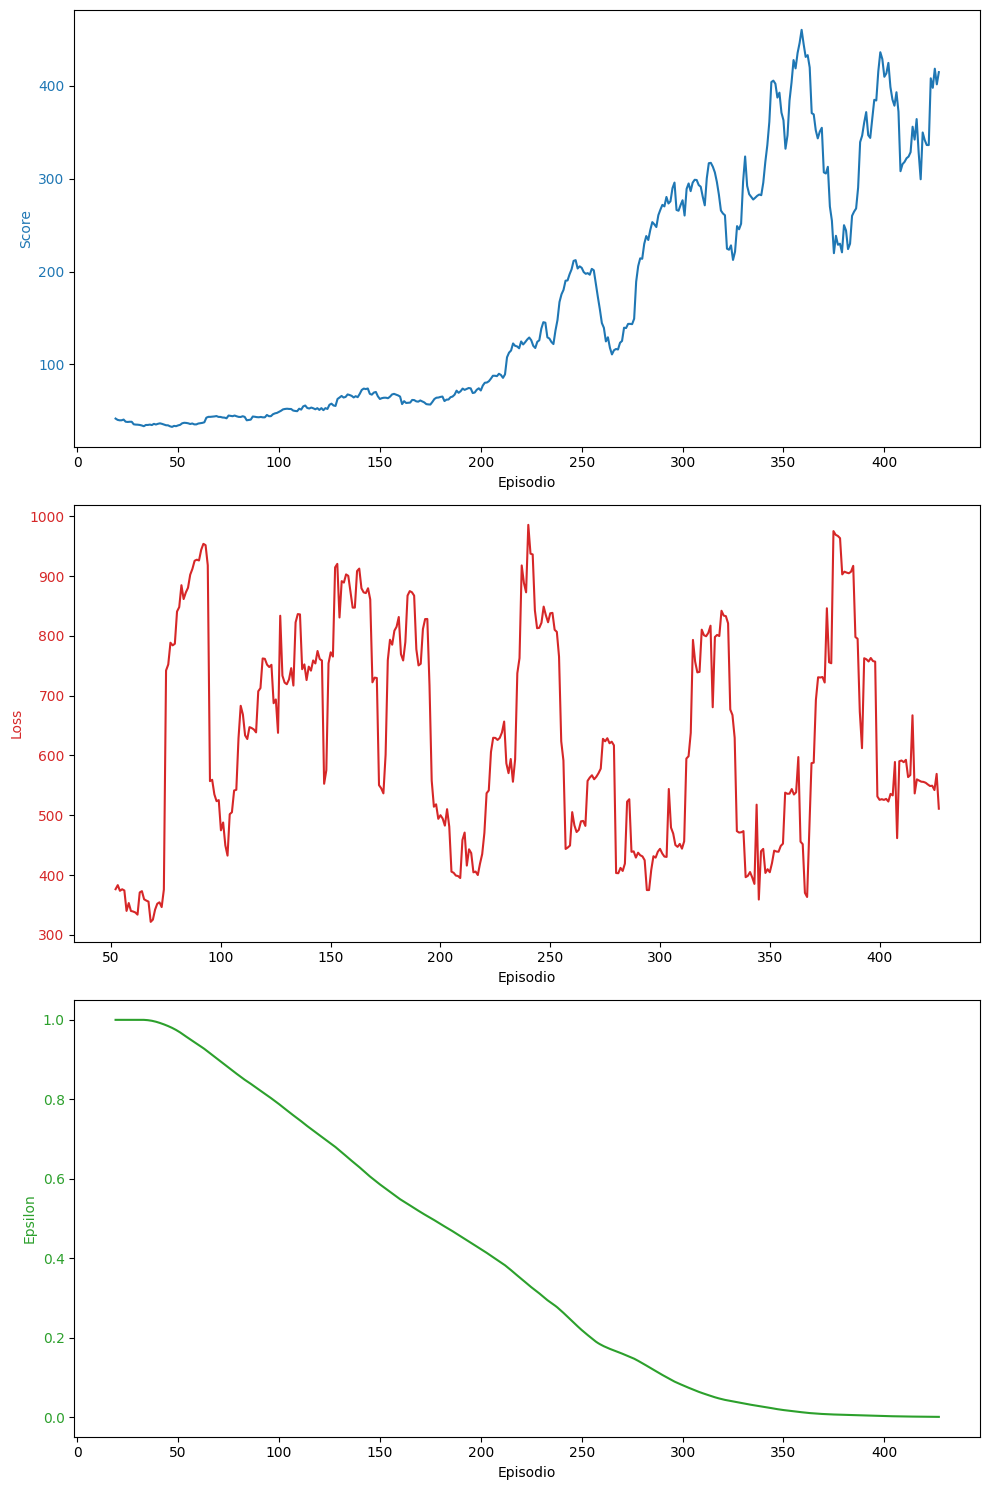

In [4]:
env = CustomEnv(render_mode='no_render')
agent = DQNAgent(env, mode='train', render_mode='no_render')
agent.run(episodes=10000)

Intentando cargar los pesos del modelo preentrenado...
Pesos cargados con éxito.
fuera del entorno!
Episodio: 1/10, Pasos Sobrevividos: 714
colisión!
fuera del entorno!
Episodio: 2/10, Pasos Sobrevividos: 667
fuera del entorno!
Episodio: 3/10, Pasos Sobrevividos: 130
fuera del entorno!
Episodio: 4/10, Pasos Sobrevividos: 363
fuera del entorno!
Episodio: 5/10, Pasos Sobrevividos: 819
fuera del entorno!
Episodio: 6/10, Pasos Sobrevividos: 152
colisión!
fuera del entorno!
Episodio: 7/10, Pasos Sobrevividos: 57
colisión!
fuera del entorno!
Episodio: 8/10, Pasos Sobrevividos: 194
fuera del entorno!
Episodio: 9/10, Pasos Sobrevividos: 279
fuera del entorno!
Episodio: 10/10, Pasos Sobrevividos: 596
Promedio de pasos sobrevividos: 397.1
Desviación típica de pasos sobrevividos: 263.49134710650367
Mejor desempeño (más pasos): 819
Peor desempeño (menos pasos): 57


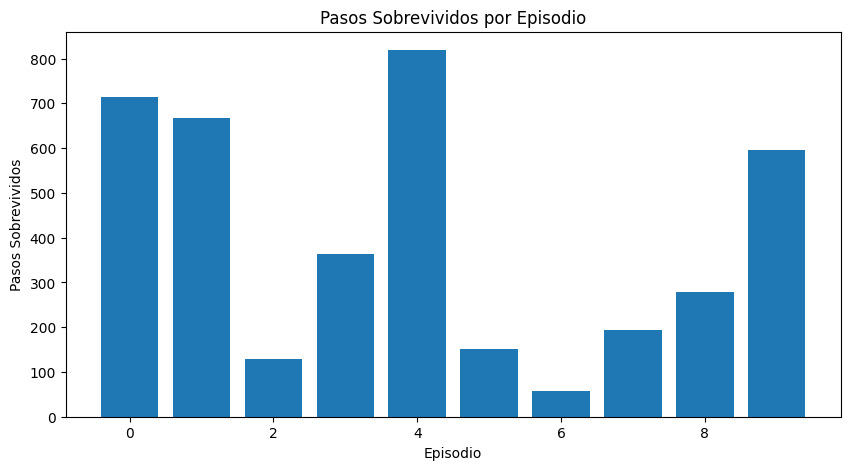

In [8]:
render_mode = 'no_render'
def simulate(agent, episodes=10):
    steps_survived = []  # Lista para guardar el número de pasos sobrevividos de cada episodio

    for e in range(episodes):
        state = agent.env.reset()
        state = np.reshape(state, [1, agent.state_size])
        done = False
        steps = 0  # Contador de pasos del episodio actual
        frames = []  # Lista para guardar los frames de cada episodio

        while not done:
            if render_mode != 'no_render':
                frames.append(agent.env.render(mode='rgb_array'))  # Guardar el frame actual
            action = np.argmax(agent.model.predict(state, verbose=0))
            next_state, _, done, _ = agent.env.step(action)
            state = np.reshape(next_state, [1, agent.state_size])
            steps += 1  # Incrementar el contador de pasos

            if done:
                break

        steps_survived.append(steps)
        print(f"Episodio: {e+1}/{episodes}, Pasos Sobrevividos: {steps}")
        # Generar un video para el episodio actual
        if render_mode != 'no_render':
            agent.env.make_video(frames, f'episode_{e+1}.gif')

    # Estadísticas
    print(f"Promedio de pasos sobrevividos: {np.mean(steps_survived)}")
    print(f"Desviación típica de pasos sobrevividos: {np.std(steps_survived)}")
    print(f"Mejor desempeño (más pasos): {np.max(steps_survived)}")
    print(f"Peor desempeño (menos pasos): {np.min(steps_survived)}")

    # Gráfica de barras
    plt.figure(figsize=(10,5))
    plt.bar(range(episodes), steps_survived)
    plt.xlabel('Episodio')
    plt.ylabel('Pasos Sobrevividos')
    plt.title('Pasos Sobrevividos por Episodio')
    plt.show()

env = CustomEnv(render_mode=render_mode)
# Crear el agente
agent = DQNAgent(env)

# Simular
simulate(agent)
